<h1><center>Deep Learning Helping Navigate Robots - Baseline</center></h1>
<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/13242/logos/thumb76_76.png?t=2019-03-12-23-33-31" width="300"></img>

### Dependencies

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

# Set seeds to make the experiment more reproducible.
from numpy.random import seed
seed(0)

### Load data

In [2]:
train = pd.read_csv('../input/X_train.csv')
labels = pd.read_csv('../input/y_train.csv')
test = pd.read_csv('../input/X_test.csv')

print('Train features shape', train.shape)
print('Train labels shape', labels.shape)
print('Test shape', test.shape)

Train features shape (487680, 13)
Train labels shape (3810, 3)
Test shape (488448, 13)


### Join train features with labels

In [3]:
train = train.join(labels, on='series_id', rsuffix='_')
train.drop('series_id_', axis=1, inplace=True)

In [4]:
print('-----Train set-----')
print(train.shape)
display(train.describe().T)

-----Train set-----
(487680, 15)


,count,mean,std,min,25%,50%,75%,max
series_id,487680.0,1904.500000,1099.853353,0.00000,952.000000,1904.500000,2857.000000,3809.00000
measurement_number,487680.0,63.500000,36.949327,0.00000,31.750000,63.500000,95.250000,127.00000
orientation_X,487680.0,-0.018050,0.685696,-0.98910,-0.705120,-0.105960,0.651803,0.98910
orientation_Y,487680.0,0.075062,0.708226,-0.98965,-0.688980,0.237855,0.809550,0.98898
orientation_Z,487680.0,0.012458,0.105972,-0.16283,-0.089466,0.031949,0.122870,0.15571
orientation_W,487680.0,-0.003804,0.104299,-0.15662,-0.106060,-0.018704,0.097215,0.15477
angular_velocity_X,487680.0,0.000178,0.117764,-2.37100,-0.040752,0.000084,0.040527,2.28220
angular_velocity_Y,487680.0,0.008338,0.088677,-0.92786,-0.033191,0.005412,0.048068,1.07910
angular_velocity_Z,487680.0,-0.019184,0.229153,-1.26880,-0.090743,-0.005335,0.064604,1.38730
linear_acceleration_X,487680.0,0.129281,1.870600,-36.06700,-0.530833,0.124980,0.792263,36.79700


In [5]:
print('-----Test set-----')
print(test.shape)
display(test.describe().T)

-----Test set-----
(488448, 13)


,count,mean,std,min,25%,50%,75%,max
series_id,488448.0,1907.500000,1101.585403,0.00000,953.750000,1907.500000,2861.250000,3815.00000
measurement_number,488448.0,63.500000,36.949327,0.00000,31.750000,63.500000,95.250000,127.00000
orientation_X,488448.0,0.031996,0.671977,-0.98972,-0.648130,0.132910,0.575270,0.98932
orientation_Y,488448.0,0.120651,0.714522,-0.98981,-0.744503,0.397860,0.803600,0.98894
orientation_Z,488448.0,0.018735,0.108481,-0.15468,-0.112660,0.057271,0.124770,0.15425
orientation_W,488448.0,0.004024,0.100957,-0.15627,-0.098435,0.022654,0.083706,0.15251
angular_velocity_X,488448.0,0.000401,0.114485,-2.40330,-0.037396,0.001107,0.037827,3.39660
angular_velocity_Y,488448.0,0.013669,0.089440,-1.19300,-0.029865,0.007276,0.051112,1.15070
angular_velocity_Z,488448.0,-0.036101,0.233791,-1.45820,-0.089842,-0.008911,0.057876,0.96028
linear_acceleration_X,488448.0,0.125433,1.832639,-35.04000,-0.486233,0.112490,0.727250,36.62800


# EDA

## Label distribution
- Let's see what's the label distribution of our data

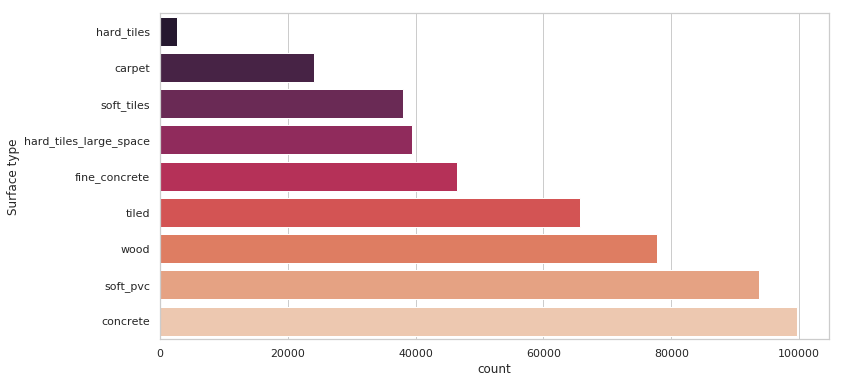

In [6]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(y='surface', data=train, palette="rocket", order=reversed(train['surface'].value_counts().index))
ax.set_ylabel("Surface type")
plt.show()

In [7]:
# df = train.groupby(['surface', 'series_id'], as_index=False).count()[['surface', 'series_id']]
# display(df.head())
# fine_concrete = df[df['surface'] == 'fine_concrete']
# concrete = df[df['surface'] == 'concrete']
# soft_tiles = df[df['surface'] == 'soft_tiles']
# tiled = df[df['surface'] == 'tiled']
# soft_pvc = df[df['surface'] == 'soft_pvc']
# hard_tiles_large_space = df[df['surface'] == 'hard_tiles_large_space']
# carpet = df[df['surface'] == 'carpet']
# hard_tiles = df[df['surface'] == 'hard_tiles']
# wood = df[df['surface'] == 'wood']
# print('fine_concrete', len(fine_concrete))
# print('concrete', len(concrete))
# print('soft_tiles', len(soft_tiles))
# print('tiled', len(tiled))
# print('soft_pvc', len(soft_pvc))
# print('hard_tiles_large_space', len(hard_tiles_large_space))
# print('carpet', len(carpet))
# print('hard_tiles', len(hard_tiles))
# print('wood', len(wood))
# print('train', train['series_id'].nunique())

In [8]:
train_splited = []
val_splited = []
gp_surface = train.groupby(['surface', 'series_id'], as_index=False).count()[['surface', 'series_id']]
for surface in gp_surface['surface'].unique():
    df = gp_surface[gp_surface['surface'] == surface]
    tra, val = train_test_split(df, test_size=0.2, random_state=0)
    train_splited += list(tra['series_id'].values)
    val_splited += list(val['series_id'].values)
    
train_splited = pd.DataFrame(train_splited, columns=['series_id'])
val_splited = pd.DataFrame(val_splited, columns=['series_id'])

### Train/validation split

In [9]:
features = ['orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W', 
            'angular_velocity_X', 'angular_velocity_Y', 'angular_velocity_Z', 
            'linear_acceleration_X', 'linear_acceleration_Y', 'linear_acceleration_Z']

# X_train, X_val, Y_train, Y_val = train_test_split(train[features], target, test_size=0.2, random_state=0)
# X_train = train[train['series_id'] >= 1000]
# X_val = train[train['series_id'] < 1000]
X_train = train_splited.merge(train)
X_val = val_splited.merge(train)

Y_train = X_train['surface']
X_train.drop('surface', axis=1, inplace=True)
X_train = X_train[features]
Y_val = X_val['surface']
X_val.drop('surface', axis=1, inplace=True)
X_val = X_val[features]
print('Train shape', X_train.shape)
print('Validation shape', X_val.shape)
display(X_train.head())

Train shape (389632, 10)
Validation shape (98048, 10)


,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,-0.98321,0.10564,0.009016,-0.14851,0.028959,-0.011703,0.026238,0.032400,4.1378,-8.8985
1,-0.98321,0.10565,0.009034,-0.14853,0.014238,-0.015342,0.030203,0.422020,3.7190,-9.1178
2,-0.98321,0.10570,0.009057,-0.14850,0.017162,-0.026594,0.038941,0.074069,3.3176,-9.4564
3,-0.98321,0.10576,0.009086,-0.14845,0.035360,-0.032865,0.037684,0.160200,3.9802,-9.1033
4,-0.98321,0.10581,0.009083,-0.14842,0.028209,-0.006577,0.039904,0.091130,3.9570,-9.1022


### Comparing train, validation and test sets

In [10]:
display(X_train.describe().T)
display(X_val.describe().T)
display(test[X_val.columns].describe().T)

,count,mean,std,min,25%,50%,75%,max
orientation_X,389632.0,-0.011281,0.684452,-0.98898,-0.695612,-0.091352,0.654160,0.98910
orientation_Y,389632.0,0.087496,0.708130,-0.98965,-0.675490,0.262195,0.816970,0.98898
orientation_Z,389632.0,0.014346,0.105969,-0.15940,-0.088141,0.035828,0.124430,0.15571
orientation_W,389632.0,-0.002826,0.104180,-0.15662,-0.103430,-0.017440,0.098673,0.15477
angular_velocity_X,389632.0,0.000227,0.116914,-2.37100,-0.040834,0.000076,0.040625,2.28220
angular_velocity_Y,389632.0,0.008488,0.088035,-0.92786,-0.033340,0.005348,0.047856,1.07910
angular_velocity_Z,389632.0,-0.019500,0.226574,-1.26880,-0.090322,-0.005183,0.065506,1.38730
linear_acceleration_X,389632.0,0.129119,1.872457,-31.14200,-0.536175,0.123975,0.795010,36.79700
linear_acceleration_Y,389632.0,2.886680,2.102415,-82.75300,1.958700,2.880000,3.802800,55.94800
linear_acceleration_Z,389632.0,-9.365829,2.827104,-65.49200,-10.200000,-9.365800,-8.513575,65.83900


,count,mean,std,min,25%,50%,75%,max
orientation_X,98048.0,-0.044949,0.689964,-0.98910,-0.734000,-0.149795,0.643890,0.98910
orientation_Y,98048.0,0.025649,0.706453,-0.98952,-0.726538,0.142520,0.679890,0.98876
orientation_Z,98048.0,0.004953,0.105654,-0.16283,-0.098758,0.019045,0.104560,0.15433
orientation_W,98048.0,-0.007688,0.104682,-0.15510,-0.111810,-0.025540,0.091660,0.15154
angular_velocity_X,98048.0,-0.000020,0.121083,-1.88260,-0.040443,0.000105,0.040127,1.70710
angular_velocity_Y,98048.0,0.007738,0.091178,-0.82208,-0.032614,0.005666,0.048837,0.73488
angular_velocity_Z,98048.0,-0.017928,0.239127,-1.25930,-0.092378,-0.005921,0.061173,0.95626
linear_acceleration_X,98048.0,0.129924,1.863211,-36.06700,-0.510722,0.130070,0.782508,34.53400
linear_acceleration_Y,98048.0,2.885625,2.283576,-121.49000,1.954575,2.878500,3.783900,73.00800
linear_acceleration_Z,98048.0,-9.361139,2.916698,-75.38600,-10.166250,-9.362600,-8.554775,55.76600


,count,mean,std,min,25%,50%,75%,max
orientation_X,488448.0,0.031996,0.671977,-0.98972,-0.648130,0.132910,0.575270,0.98932
orientation_Y,488448.0,0.120651,0.714522,-0.98981,-0.744503,0.397860,0.803600,0.98894
orientation_Z,488448.0,0.018735,0.108481,-0.15468,-0.112660,0.057271,0.124770,0.15425
orientation_W,488448.0,0.004024,0.100957,-0.15627,-0.098435,0.022654,0.083706,0.15251
angular_velocity_X,488448.0,0.000401,0.114485,-2.40330,-0.037396,0.001107,0.037827,3.39660
angular_velocity_Y,488448.0,0.013669,0.089440,-1.19300,-0.029865,0.007276,0.051112,1.15070
angular_velocity_Z,488448.0,-0.036101,0.233791,-1.45820,-0.089842,-0.008911,0.057876,0.96028
linear_acceleration_X,488448.0,0.125433,1.832639,-35.04000,-0.486233,0.112490,0.727250,36.62800
linear_acceleration_Y,488448.0,2.906588,2.094727,-107.48000,2.052100,2.900300,3.758000,55.62400
linear_acceleration_Z,488448.0,-9.359811,2.802670,-83.17300,-10.125000,-9.361700,-8.582075,59.63300


### Train & Validation label distribution

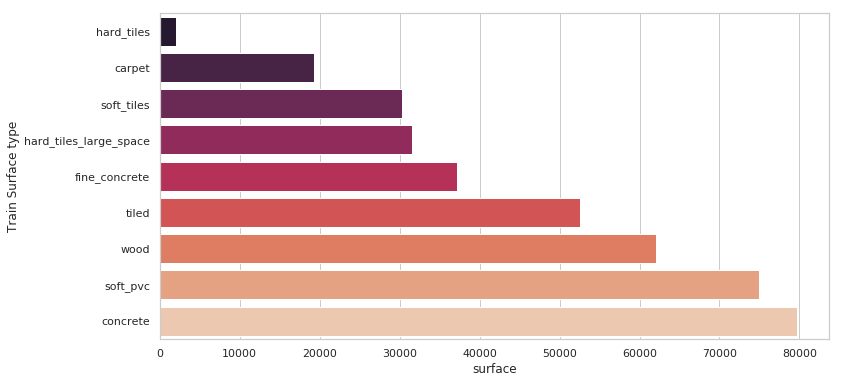

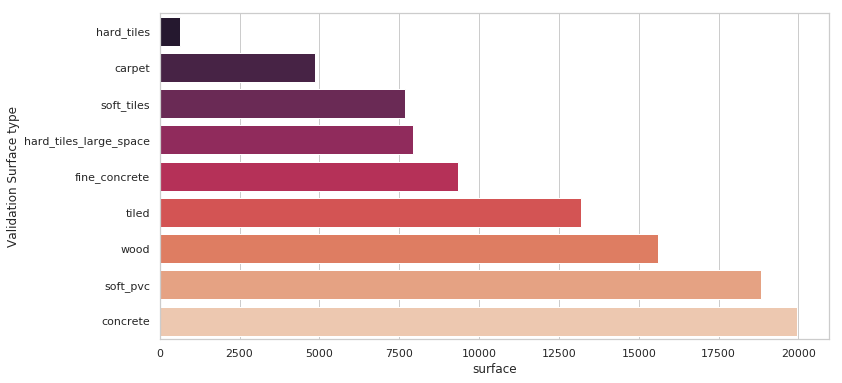

In [11]:
df = Y_train.value_counts().to_frame()
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(y=df.index, x='surface', data=df, palette="rocket", order=reversed(df.index))
ax.set_ylabel("Train Surface type")
plt.show()

df = Y_val.value_counts().to_frame()
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(y=df.index, x='surface', data=df, palette="rocket", order=reversed(df.index))
ax.set_ylabel("Validation Surface type")
plt.show()

### Train & Validation series distribution

## Features distribution
- Now would be a good idea to see how each other type of features behavior

### Orientation distribution

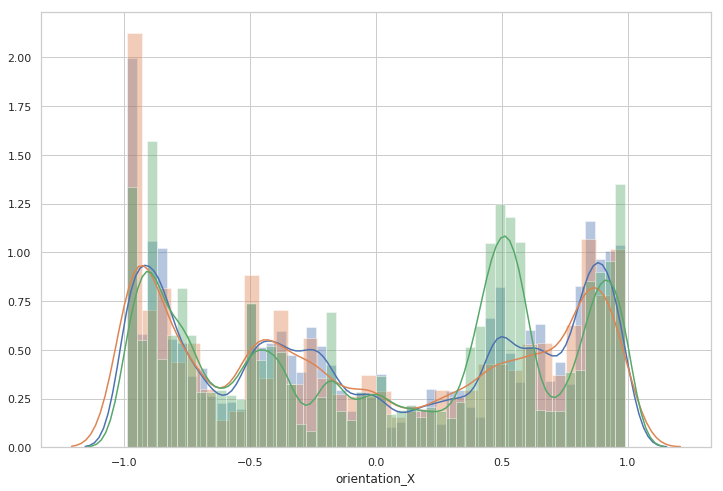

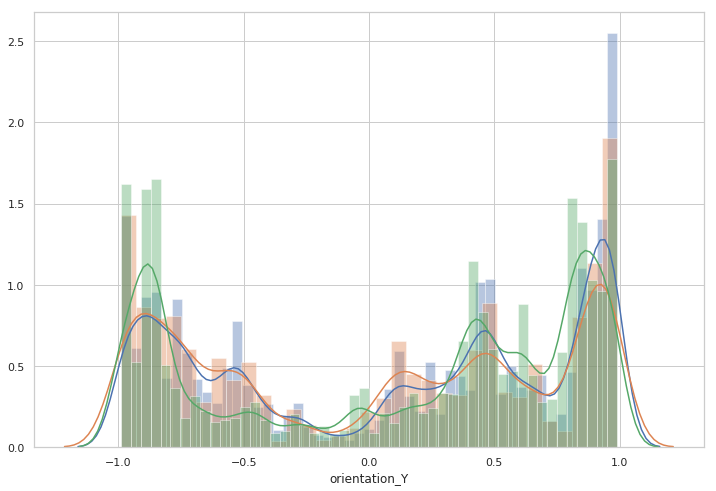

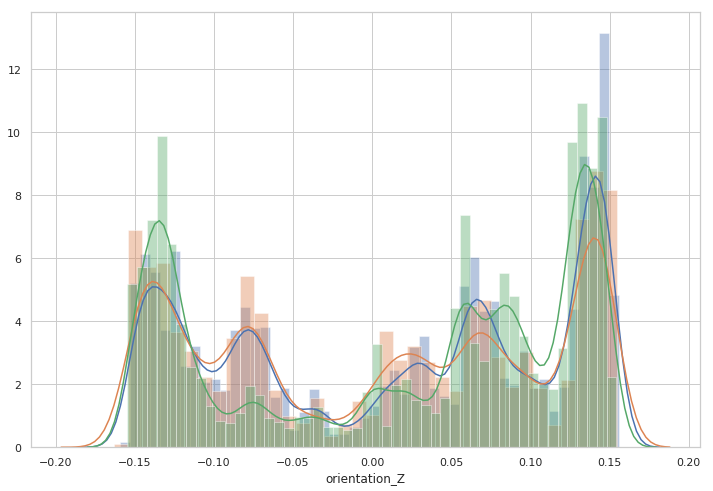

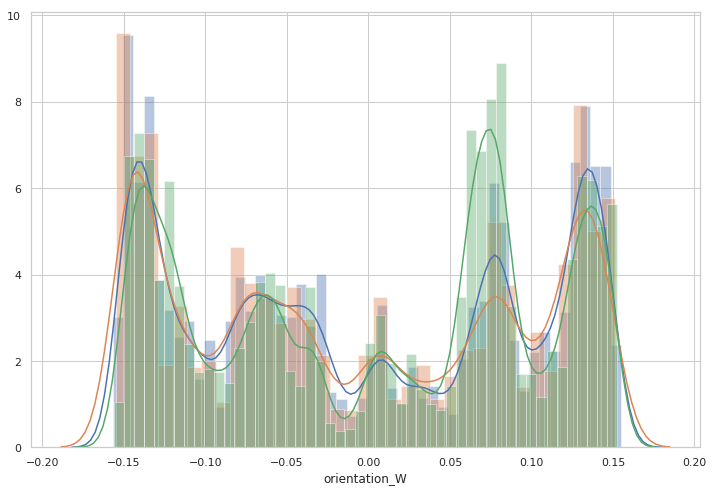

In [12]:
orientation_features = ['orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W']
for feature in orientation_features:
    f, ax = plt.subplots(figsize=(12, 8))
    sns.distplot(X_train[feature])
    sns.distplot(X_val[feature])
    sns.distplot(test[feature])
    plt.show()

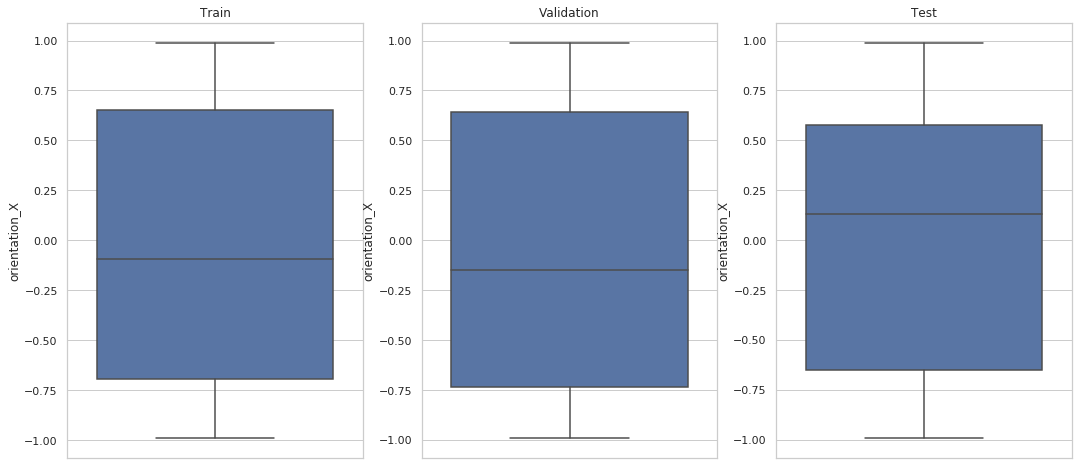

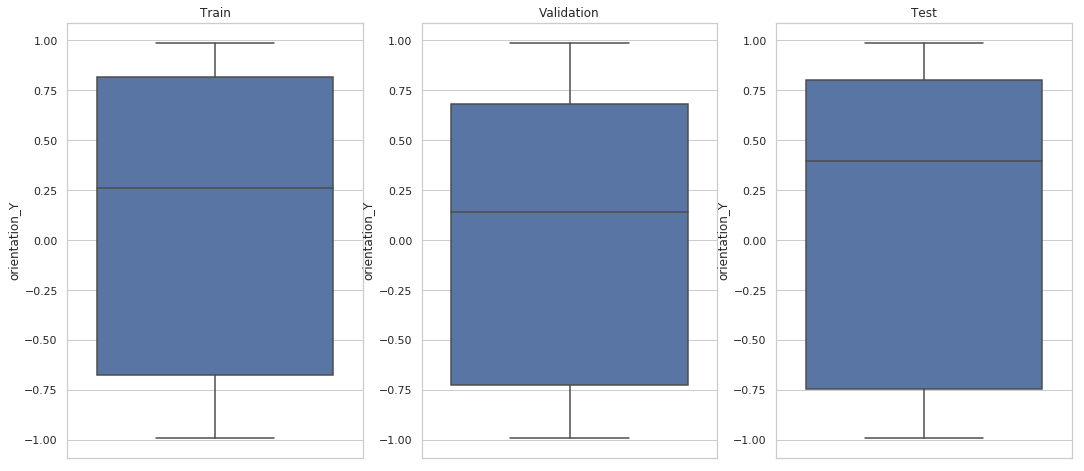

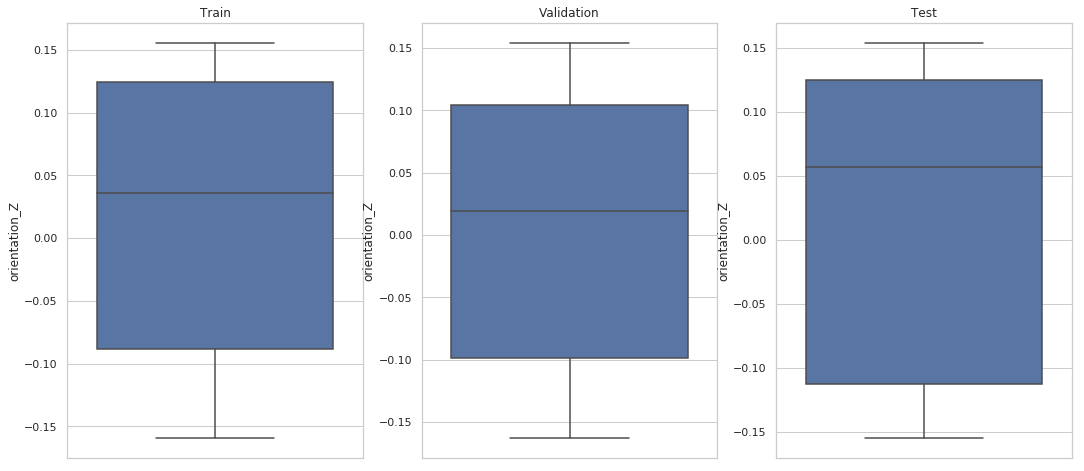

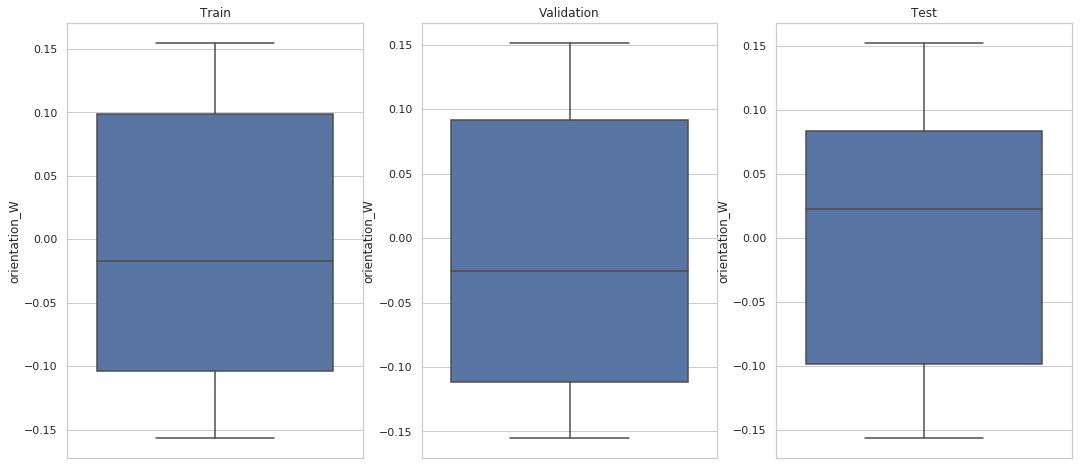

In [13]:
for feature in orientation_features:
    f, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
    sns.boxplot(y=X_train[feature], ax=axes[0]).set_title('Train')
    sns.boxplot(y=X_val[feature], ax=axes[1]).set_title('Validation')
    sns.boxplot(y=test[feature], ax=axes[2]).set_title('Test')
    plt.show()

The interesting part here is that "orientation_Y" and "orientation_X" are far more spread than the other two.

### Angular velocity distribution

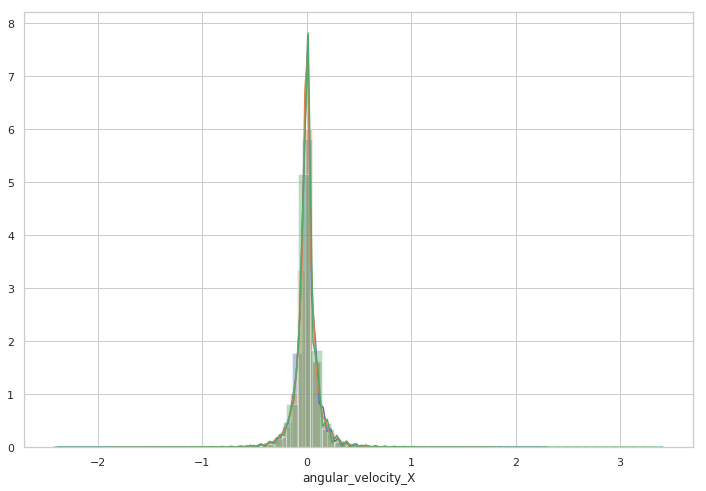

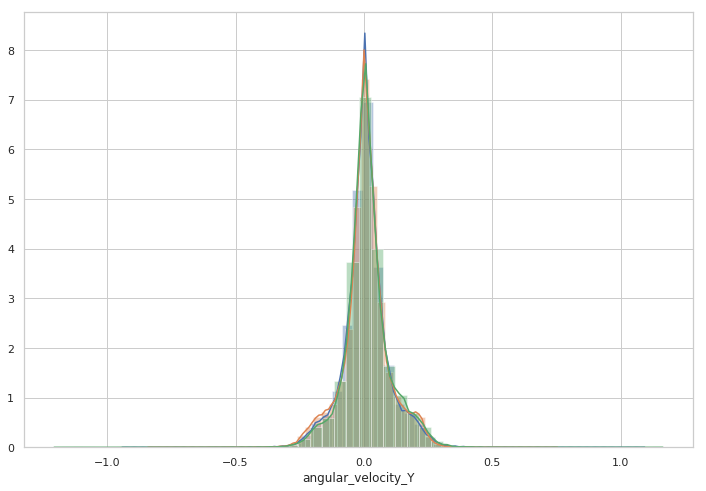

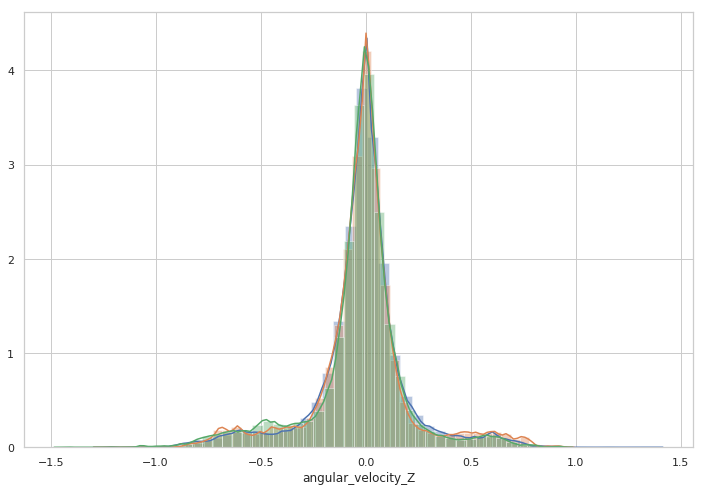

In [14]:
velocity_features = ['angular_velocity_X', 'angular_velocity_Y', 'angular_velocity_Z']
for feature in velocity_features:
    f, ax = plt.subplots(figsize=(12, 8))
    sns.distplot(X_train[feature])
    sns.distplot(X_val[feature])
    sns.distplot(test[feature])
    plt.show()

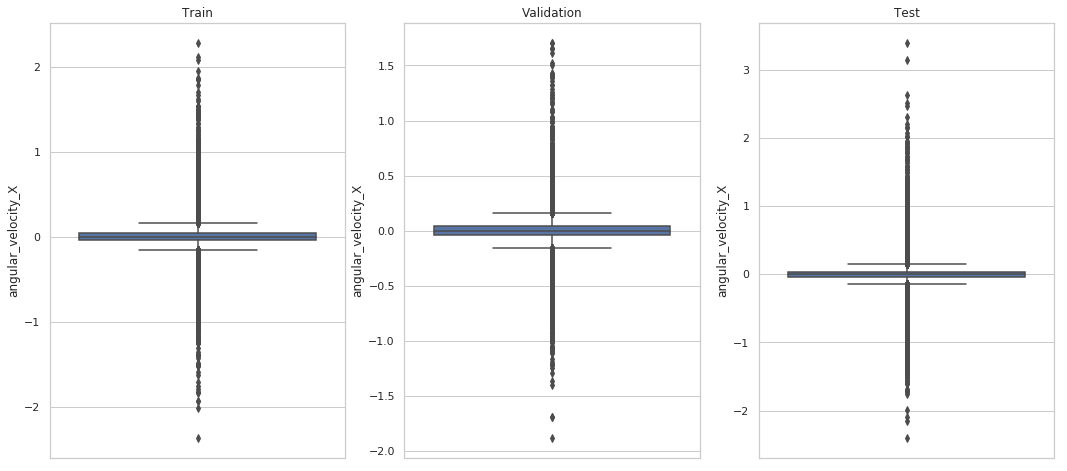

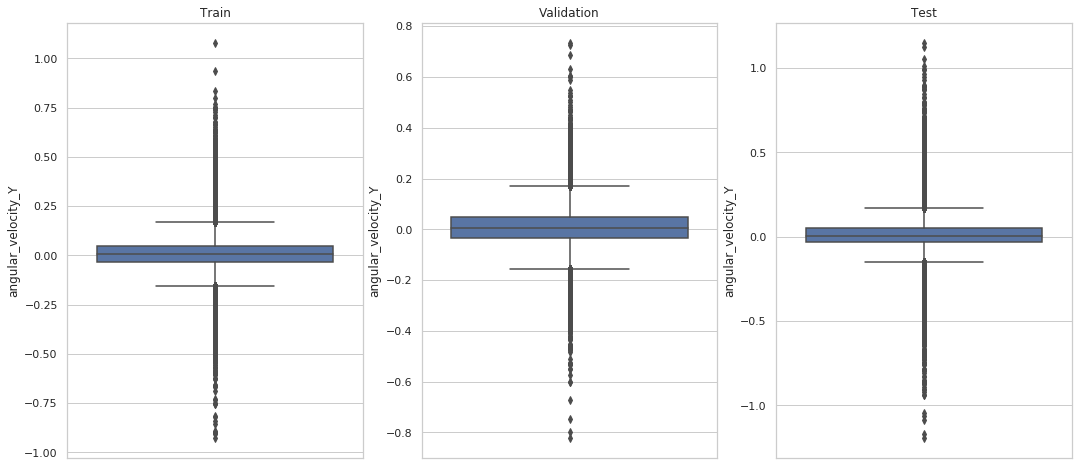

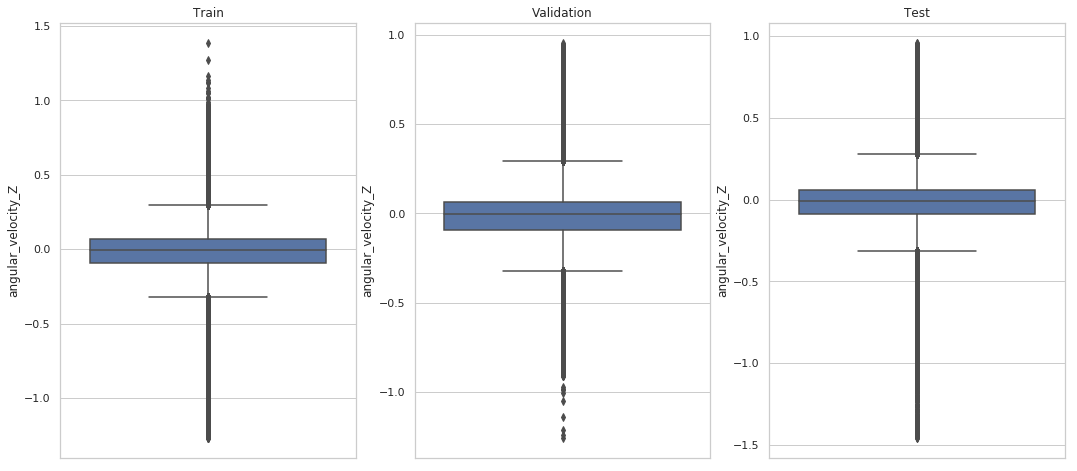

In [15]:
for feature in velocity_features:
    f, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
    sns.boxplot(y=X_train[feature], ax=axes[0]).set_title('Train')
    sns.boxplot(y=X_val[feature], ax=axes[1]).set_title('Validation')
    sns.boxplot(y=test[feature], ax=axes[2]).set_title('Test')
    plt.show()

Here all the angular velocity features seem to be centered around 0, but "angular_velocity_Y" is less spread than the others.

### Linear acceleration distribution

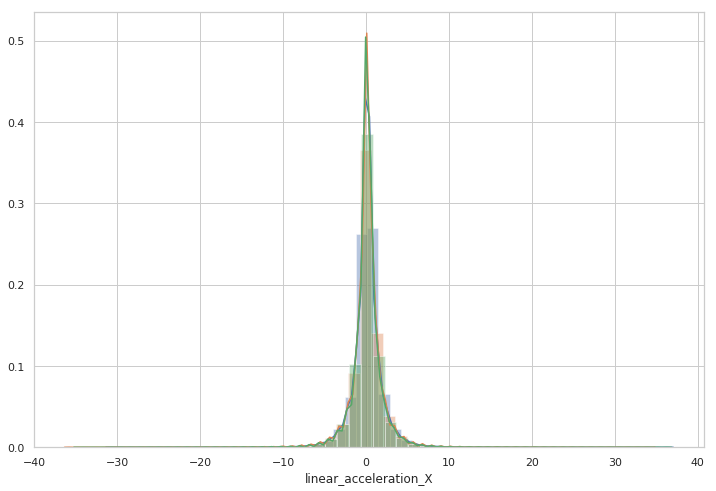

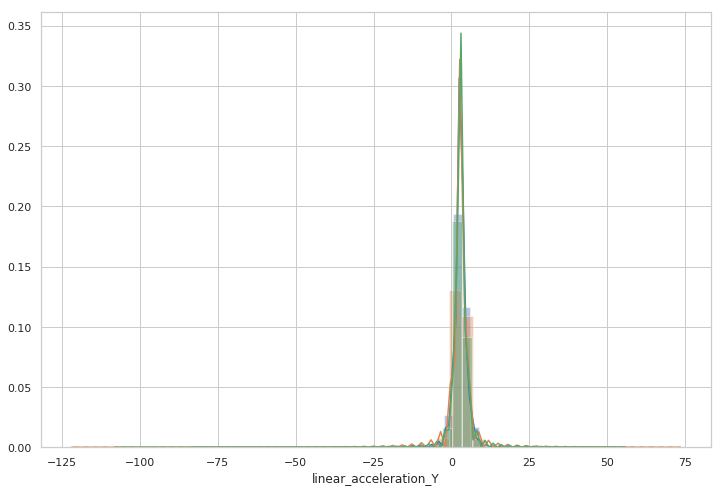

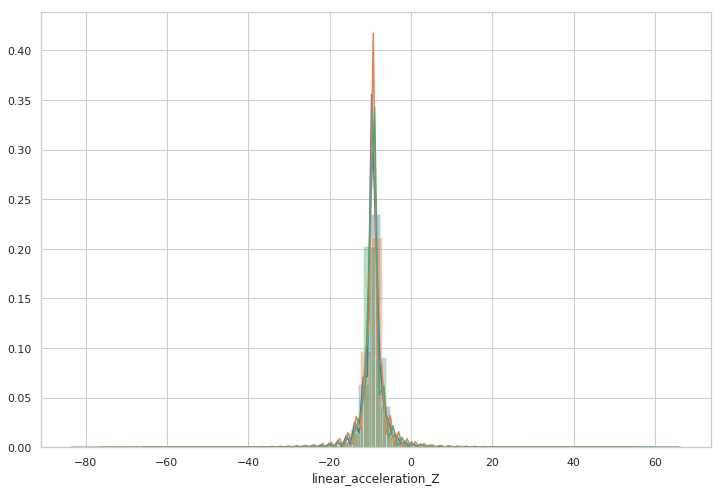

In [16]:
acceleration_features = ['linear_acceleration_X', 'linear_acceleration_Y', 'linear_acceleration_Z']
for feature in acceleration_features:
    f, ax = plt.subplots(figsize=(12, 8))
    sns.distplot(X_train[feature])
    sns.distplot(X_val[feature])
    sns.distplot(test[feature])
    plt.show()

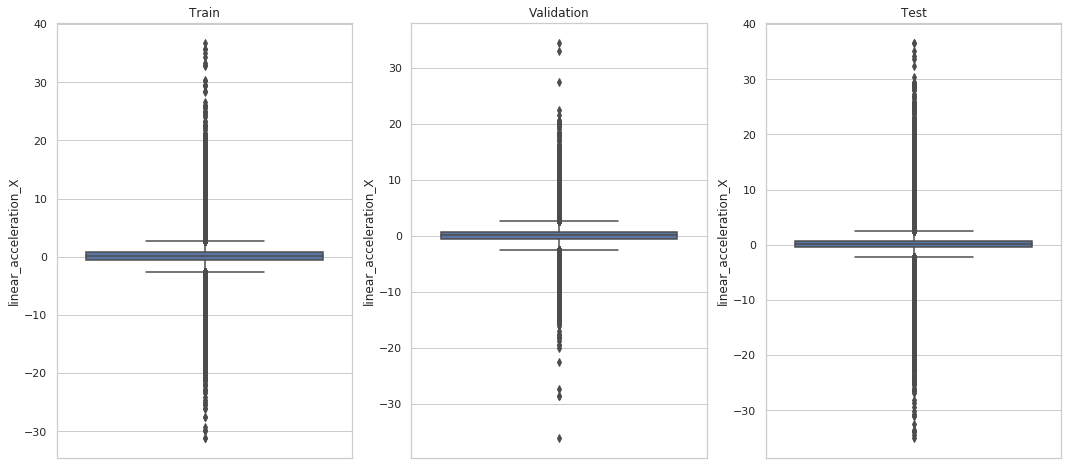

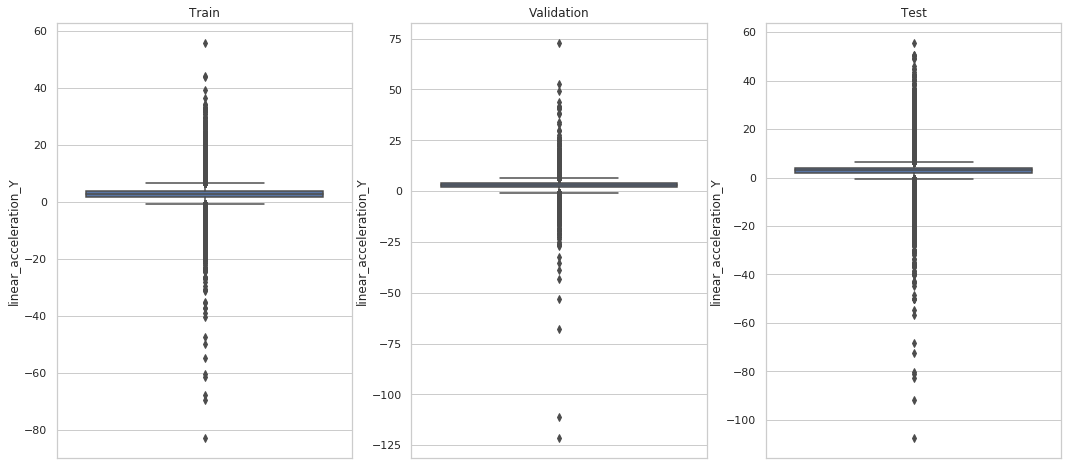

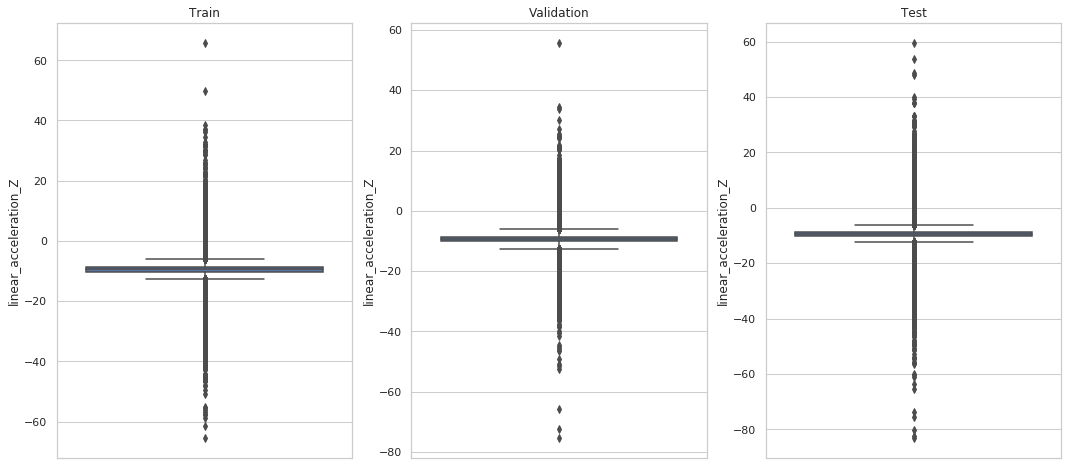

In [17]:
for feature in acceleration_features:
    f, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
    sns.boxplot(y=X_train[feature], ax=axes[0]).set_title('Train')
    sns.boxplot(y=X_val[feature], ax=axes[1]).set_title('Validation')
    sns.boxplot(y=test[feature], ax=axes[2]).set_title('Test')
    plt.show()

The linear acceleration features seem to be the most different between itself, all 3 features have different mean and spread.